In [111]:
import pandas as pd
import numpy as np

In [112]:
advertising = pd.read_csv('./Multplr-LR-Code-for-Udemy/Multplr_LR_Code_for Udemy/advertising.csv')
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [113]:
# Three independent variables and one dependent variables
advertising.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [114]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [115]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Visualizing data

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

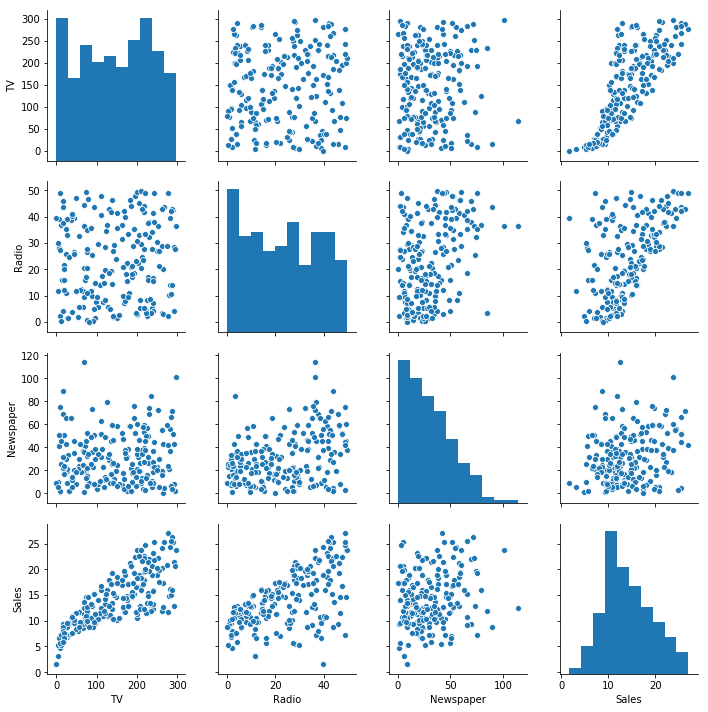

In [117]:
sns.pairplot(advertising)
plt.show()

/usr/local/anaconda/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


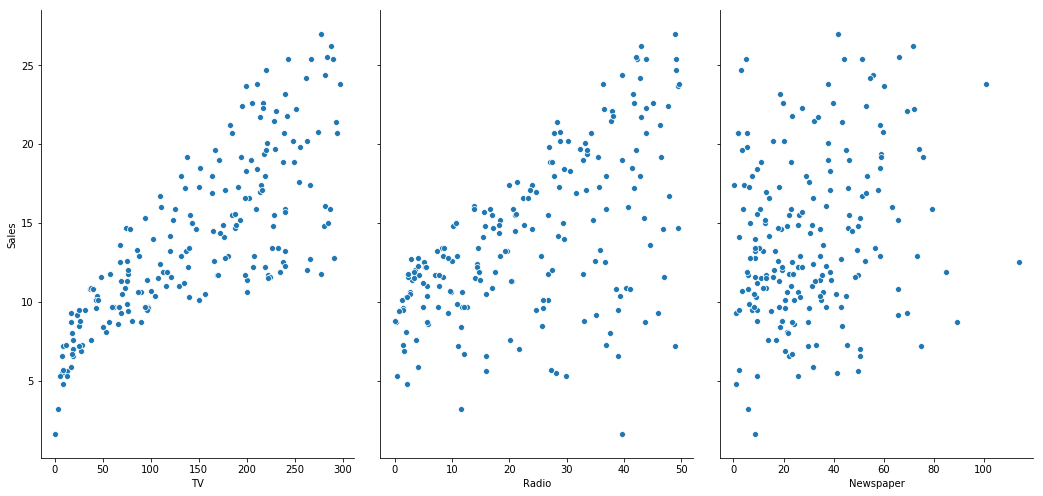

In [118]:
# Visualizing variables w.r.t Sales only
sns.pairplot(advertising, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='scatter')

In [119]:
# Splitting data for Training and Testing sets
x = advertising[['TV', 'Radio', 'Newspaper']]
y = advertising['Sales']

In [120]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=100)

/usr/local/anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [121]:
x_train

,TV,Radio,Newspaper
74,213.4,24.6,13.1
3,151.5,41.3,58.5
185,205.0,45.1,19.6
26,142.9,29.3,12.6
90,134.3,4.9,9.3
127,80.2,0.0,9.2
81,239.8,4.1,36.9
88,88.3,25.5,73.4
119,19.4,16.0,22.3
110,225.8,8.2,56.5


# Perform Linear Regression

In [122]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [123]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Model Evaluation

In [124]:
print(lr.intercept_)

2.652789668879498


In [125]:
lr.coef_

array([0.0454256 , 0.18975773, 0.00460308])

In [126]:
# To view in dataframe
coef_df = pd.DataFrame(lr.coef_, x_test.columns, columns=['Coefficient'])
coef_df

,Coefficient
TV,0.045426
Radio,0.189758
Newspaper,0.004603


In [127]:
# How to infer these statement
# For example coefficient for TV = 0.045
# It means if we increase TV marketing by 1, it's Sales will increase by 0.045

# Predictions

In [128]:
# Making prediction using the model
y_pred = lr.predict(x_test)

In [129]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [130]:
print('Mean squared error: ', mse)
print('R2 score', r_squared)

Mean squared error:  1.8506819941636943
R2 score 0.9058622107532247


In [131]:
# So we can se our mse and r2 values are really good. Let's some more digging

# Optional Step: Checking P-Value using Statsmodel

In [132]:
import statsmodels.api as sm
x_train_sm = x_train

# To add a constant, since it is not automatically added in statsmodel
x_train_sm = sm.add_constant(x_train_sm)

# Create a fitted model
lr_1 = sm.OLS(y_train, x_train_sm).fit()

# print the coefficients
lr_1.params

const        2.652790
TV           0.045426
Radio        0.189758
Newspaper    0.004603
dtype: float64

In [133]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           9.97e-66
Time:                        08:55:54   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.0

# Let's understand this table now :
Coefficient we already know
Standard error is the standard deviation, it should be kept low. If the coeff is increases std err is increase. We can
say actual value of Coef = Coef +- std err.
t = coef/std err. It is not normally used, it is used in calculating P value.
P value : This is the main column we will look around. It tells us that which column should be kept in our model and
which should not be kept. In statistics this P-value is being used for Null Hypothesis. If p-value more than certain
value say 0.05 will "Not reject the null hypothesis", else we will "Reject the null hypothesis".

H0: The variable which we are considering is not significant. 
H1: The variable is going to be significant

So in our table p-value for column Newspaper is way to much. So in this case we will fail to reject our Null Hypothesis.
So we can say that we can create our model with only TV and Radio, not considering Newpaper at all.

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

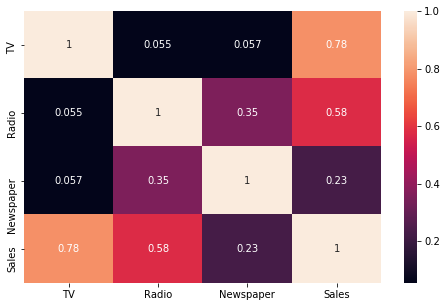

In [135]:
plt.figure(figsize = (8, 5))
sns.heatmap(advertising.corr(), annot=True)
plt.show()

In [136]:
# We can the correlation is pretty high for others as compared with Newspaper

# Implementing the results and running the model again

From the above results we conclude that Newspaper column is insignificant.

In [137]:
x_train_new = x_train[['TV', 'Radio']]
x_test_new = x_test[['TV', 'Radio']]

In [138]:
lr.fit(x_train_new, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [139]:
# Making Prediction
y_pred_new = lr.predict(x_test_new)

Text(0, 0.5, 'Sales')

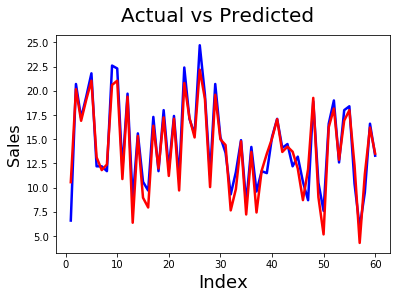

In [140]:
# Actual vs predicted
c = [i for i in range (1, 61, 1)]
fig = plt.figure()
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_new, color='red', linewidth=2.5, linestyle='-')
fig.suptitle('Actual vs Predicted', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Sales', fontsize=16)

In [141]:
# We can see in the figure above that the difference between Actual and Predicted value is very low (By the removal of 
# Newspaper column)

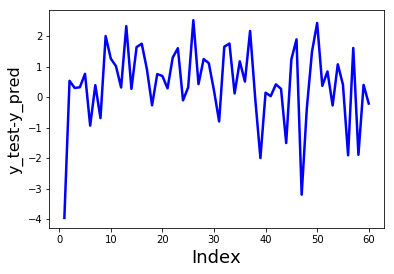

In [142]:
# Plotting the error
plt.plot(c, y_test-y_pred_new, color='blue', linewidth=2.5, linestyle='-')
fig.suptitle('Error', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('y_test-y_pred', fontsize=16)
plt.show()

In [143]:
# Here in the fig above we can se the error is quite low
# Now let's look at R2 and mse
mse = mean_squared_error(y_test, y_pred_new)
r2 = r2_score(y_test, y_pred_new)

print('Mean squared error: ', mse)
print('R squared score: ', r2)

Mean squared error:  1.78474005209028
R squared score:  0.909216449171822


In [144]:
# Look at the statmodel summary
x_train_final = x_train_new
x_train_final = sm.add_constant(x_train_final)

lr_final = sm.OLS(y_train, x_train_final).fit()

print(lr_final.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     568.8
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           4.46e-67
Time:                        08:55:56   Log-Likelihood:                -281.03
No. Observations:                 140   AIC:                             568.1
Df Residuals:                     137   BIC:                             576.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7190      0.368      7.392      0.0

In [145]:
# So our equation can be y = beta0 + beta1*x can be written as
# y = 2.7190 + 0.0455*TV + 0.1925*Radio

# Simple linear Regression with Newspaper and Sales

In [146]:
x = advertising[['Newspaper']]
y = advertising[['Sales']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=100)

/usr/local/anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [147]:
# x_train = x_train[:, np.newaxis]
# y_train = y_train[:, np.newaxis]
# x_test = x_test[:, np.newaxis]
# y_test = y_test[:, np.newaxis]

In [148]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [149]:
y_pred = lr.predict(x_test)

In [150]:
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error: ', mse)
print('R squared error: ', r2)

Mean squared error:  22.783129716276214
R squared error:  -0.1588989736629216


In [151]:
# We can see the value of MSE is huge and R2 value in very low(-ve infact).
# Negative R2 value represent that the line created by the model is worse than the horizontal line.

In [152]:
print(lr.coef_[0])
print(lr.intercept_)

[0.07549167]
[11.48439917]


# Housing Case Study

In [153]:
import pandas as pd
import numpy as np

In [154]:
# Importing Housing.csv
housing = pd.read_csv('./Multplr-LR-Code-for-Udemy/Multplr_LR_Code_for Udemy/Housing.csv')

In [155]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [156]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.4+ KB


In [157]:
# Here in this data, we have many categorical data (Those data having values yes/no)
# So the problem with this data is to map into our line equation.
# Solution is to map yes as 1 and no as 0.
# But again we have a prolem. With furnishingStatus data column. It has values furnished, semi-furnished and unfurnished.
# No how to handle these kind of categorical data with more than two values in it.

# Data preparation
Convert data with yes as 1 and no as 0

In [158]:
# Converting yes to 1 and no to 0
housing['mainroad'] = housing['mainroad'].map({'yes': 1, 'no': 0})
housing['guestroom'] = housing['guestroom'].map({'yes': 1, 'no': 0})
housing['basement'] = housing['basement'].map({'yes': 1, 'no': 0})
housing['hotwaterheating'] = housing['hotwaterheating'].map({'yes': 1, 'no': 0})
housing['airconditioning'] = housing['airconditioning'].map({'yes': 1, 'no': 0})
housing['prefarea'] = housing['prefarea'].map({'yes': 1, 'no': 0})

In [159]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [160]:
# Handling furnishingstatus variable
# We cannot assign values such as 0, 1 and 2 to furnished, semi-furnished and unfurnished.
# Instead we can create separate columns for them.
# Using get_dummies we can create separate dummy columns for furnishingstatus
status = pd.get_dummies(housing['furnishingstatus'])

In [161]:
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [162]:
# Now we can derive the values of a column when we know values of 2 columns. So we can drop a column
status = pd.get_dummies(housing['furnishingstatus'], drop_first=True)

In [163]:
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [164]:
# Adding the columns of status to our data and deleting furnishingstatus column
housing = pd.concat([housing, status], axis=1)

In [165]:
housing.drop(['furnishingstatus'], axis=1, inplace=True)

In [166]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [167]:
# Let us create some variable which can be a good factor, such as "area per bedroom" or "bathroom per bedroom"
housing['areaperbedroom'] = housing['area']/housing['bedrooms']
housing['bbratio'] = housing['bathrooms']/housing['bedrooms']

In [168]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.0,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,0.250000


# Rescaling values

Since values of some columns are huge it is going to dominate the output. We need to take care of such variables using:
1. Standardisation
2. Normalisation
We'll see normalisation in this scenario

In [169]:
def normalize(x):
    return (x-np.mean(x))/(max(x)-min(x))

In [170]:
housing = housing.apply(normalize)

In [171]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,0.738811,0.155977,0.206972,0.237920,0.398165,0.141284,-0.177982,-0.350459,-0.045872,0.684404,0.435474,0.765138,-0.416514,-0.326606,0.005652,0.064367
1,0.647902,0.261818,0.206972,0.904587,0.731498,0.141284,-0.177982,-0.350459,-0.045872,0.684404,0.768807,-0.234862,-0.416514,-0.326606,0.067559,0.664367
2,0.647902,0.330547,0.006972,0.237920,0.064832,0.141284,-0.177982,0.649541,-0.045872,-0.315596,0.435474,0.765138,0.583486,-0.326606,0.241220,0.264367
3,0.644872,0.161475,0.206972,0.237920,0.064832,0.141284,-0.177982,0.649541,-0.045872,0.684404,0.768807,0.765138,-0.416514,-0.326606,0.008868,0.064367
4,0.575175,0.155977,0.206972,-0.095413,0.064832,0.141284,0.822018,0.649541,-0.045872,0.684404,0.435474,-0.234862,-0.416514,-0.326606,0.005652,-0.235633


# Splitting data into training set and testing set

In [172]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio'],
      dtype='object')

In [173]:
x = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio']]

In [174]:
y = housing['price']

In [175]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

In [176]:
import statsmodels.api as sm
x_train = sm.add_constant(x_train)
lm_1 = sm.OLS(y_train, x_train).fit()

In [177]:
lm_1.summary()
# If we wouldn't have rescaled our value the coeff for some columns (those columns with very high values) would 
# have been very high. Which would have dominated the equation.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     53.12
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           4.56e-82
Time:                        08:55:58   Log-Likelihood:                 384.40
No. Observations:                 381   AIC:                            -736.8
Df Residuals:                     365   BIC:                            -673.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0022      0.005      0.474      0.636      -0.007       0.011
area                0.5745      0.134      4.285      0.000       0.311       0.838
bedrooms           -0.0587      0.093     -0.632      0.528      -0.241       0.124
bathrooms           0.2336      0.126      1.849      0.065      -0.015       0.482
stories             0.1018      0.019      5.265      0.000       0.064       0.140
mainroad            0.0511      0.014      3.580      0.000       0.023       0.079
guestroom           0.0260      0.014      1.887      0.060      -0.001       0.053
basement            0.0208      0.011      1.877      0.061      -0.001       0.043
hotwaterheating     0.0875      0.022      4.048      0.000       0.045       0.130
airconditioning     0.0663      0.011      5.868      0.000       0.044       0.088
parking             0.0562      0.018      3.104      0.002       0.021       0.092
prefarea            0.0566      0.012      4.772      0.000       0.033       0.080
semi-furnished     -0.0008      0.012     -0.068      0.946      -0.024       0.022
unfurnished        -0.0323      0.013     -2.550      0.011      -0.057      -0.007
areaperbedroom     -0.3135      0.147     -2.139      0.033      -0.602      -0.025
bbratio             0.0439      0.104      0.421      0.674      -0.161       0.249
==============================================================================
Omnibus:                       87.283   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              276.328
Skew:                           1.023   Prob(JB):                     9.91e-61
Kurtosis:                       6.636   Cond. No.                         47.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# VIF Calculation

In [178]:
# UDF for calculating VIF
def vifCalculate(input_data, dependent_column):
    vif_df = pd.DataFrame(columns=['Var', 'Vif'])
    x_vars = input_data.drop([dependent_column], axis=1)
    x_vars_columns = x_vars.columns
    for i in range (0, x_vars_columns.shape[0]):
        y = x_vars[x_vars_columns[i]]
        x = x_vars.drop(x_vars_columns[i], axis=1)
        rsq = sm.OLS(y, x).fit().rsquared
        vif = round((1/(1-rsq)), 2)
        vif_df.loc[i] = [x_vars_columns[i], vif]
    return vif_df.sort_values(by='Vif', axis=0, ascending=False, inplace=False)

In [179]:
# Calculating Vif values
vifCalculate(input_data=housing, dependent_column='price')

,Var,Vif
2,bathrooms,20.21
14,bbratio,19.04
13,areaperbedroom,17.59
0,area,16.00
1,bedrooms,9.11
12,unfurnished,1.68
11,semi-furnished,1.59
3,stories,1.51
6,basement,1.33
5,guestroom,1.23


# Checking Vif
Now from the summary above VIF Calculation check the variable which have highest p-value. So semi-furnished variable has p-value above 0.9, but it's Vif is pretty low ie 1.59, in this case we will not rush. Since it's p-value is quite low.
Now check the next variable with high p-value, bbratio has high p-value of 0.674. It's VIF is quite high, >19, so we can go ahead and remove this column.

# Drop the variable and update the model

In [180]:
# Dropping highly correlated variable and insignificant variable
x_train = x_train.drop(['bbratio'], axis=1)

In [181]:
# Create second fitted model and view it's summary
print(sm.OLS(y_train, x_train).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     57.03
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           6.46e-83
Time:                        08:55:59   Log-Likelihood:                 384.31
No. Observations:                 381   AIC:                            -738.6
Df Residuals:                     366   BIC:                            -679.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0022      0.005     

In [182]:
# Checking vif for updated model
vifCalculate(input_data=housing.drop(['bbratio'], axis=1), dependent_column='price')

,Var,Vif
13,areaperbedroom,14.14
0,area,12.84
1,bedrooms,4.99
12,unfurnished,1.68
11,semi-furnished,1.59
3,stories,1.50
6,basement,1.32
2,bathrooms,1.29
5,guestroom,1.22
9,parking,1.22


In [183]:
# On the above summary variable has high p-value, also it's vif is found pretty high, 4.99 as compare with others.
# So we can go ahead and drop the columns and create new fitted model.
x_train = x_train.drop(['bedrooms'], axis=1)
print(sm.OLS(y_train, x_train).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     61.23
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           1.66e-83
Time:                        08:55:59   Log-Likelihood:                 383.55
No. Observations:                 381   AIC:                            -739.1
Df Residuals:                     367   BIC:                            -683.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0021      0.005     

In [184]:
# Checking vif
vifCalculate(input_data=housing.drop(['bedrooms', 'bbratio'], axis=1), dependent_column='price')

,Var,Vif
0,area,4.21
12,areaperbedroom,3.88
11,unfurnished,1.67
10,semi-furnished,1.58
2,stories,1.49
5,basement,1.32
1,bathrooms,1.29
8,parking,1.22
4,guestroom,1.21
7,airconditioning,1.21


In [185]:
# let's say we want to to p-value to be less than 0.01, from summary we can see few variable above those values.
# Areaperbedroom has p-value=0.026 and vif=3.88. Since it's vif is quite high and p-value is a bit high too, we remove it.
# semi-furnished can be removed too now, it's vif is more wrt others.

# Now creating our new model and calculating vif for it.
x_train = x_train.drop(['areaperbedroom', 'semi-furnished'], axis=1)
lm_6 = sm.OLS(y_train, x_train).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           2.73e-84
Time:                        08:55:59   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0013      0.005     

In [186]:
# Check vif for the new model
vifCalculate(input_data=housing.drop(['bbratio', 'bedrooms', 'areaperbedroom', 'semi-furnished'], axis=1), dependent_column='price')

,Var,Vif
0,area,1.32
2,stories,1.30
5,basement,1.30
1,bathrooms,1.22
4,guestroom,1.21
8,parking,1.21
7,airconditioning,1.20
3,mainroad,1.15
9,prefarea,1.15
10,unfurnished,1.07


In [187]:
# Now we again see the summary and vif and decide to remove some other value. So it an art to decide which value to remove
# It goes on untill we decide to stop.

# Prediction with the final model

In [188]:
x_test_m6 = sm.add_constant(x_test)
x_test_m6 = x_test_m6.drop(['bbratio', 'bedrooms', 'areaperbedroom', 'semi-furnished'], axis=1)

In [189]:
y_pred_m6 = lm_6.predict(x_test_m6)

# Actual vs Predicted

Text(0, 0.5, 'Housing Price')

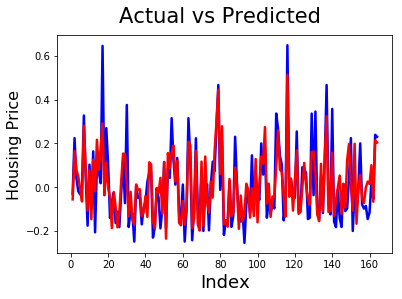

In [190]:
c = [i for i in range (1, 165, 1)]
fig = plt.figure()
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_m6, color='red', linewidth=2.5, linestyle='-')
fig.suptitle('Actual vs Predicted', fontsize=21)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Housing Price', fontsize=16)

Text(0, 0.5, 'Housing Price')

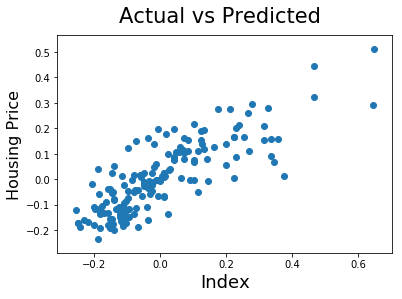

In [191]:
# Plotting relationship between Actual and Predicted in scatter graph
fig = plt.figure()
plt.scatter(y_test, y_pred_m6)
fig.suptitle('Actual vs Predicted', fontsize=21)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Housing Price', fontsize=16)
# We can see it's quite good relationship between Actual and Predicted. If Actual increases Predicted is also increased.

Text(0, 0.5, 'y_test-y_pred_m6')

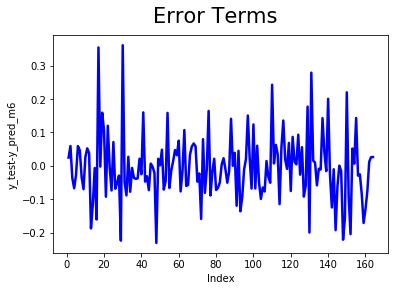

In [192]:
# Error terms
fig = plt.figure()
c = [i for i in range(1, 165, 1)]
plt.plot(c, (y_test-y_pred_m6), color='blue', linewidth=2.5, linestyle='-')
fig.suptitle('Error Terms', fontsize=21)
plt.xlabel('Index')
plt.ylabel('y_test-y_pred_m6')

/usr/local/anaconda/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Index')

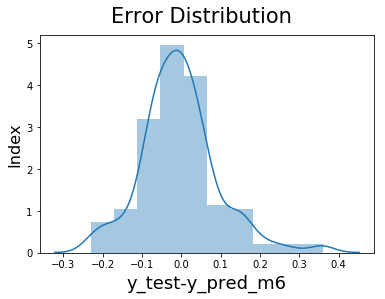

In [193]:
# Error Distribution
sns.distplot((y_test-y_pred_m6), bins=10)
plt.suptitle('Error Distribution', fontsize=21)
plt.xlabel('y_test-y_pred_m6', fontsize=18)
plt.ylabel('Index', fontsize=16)

In [194]:
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_m6)))

RMSE : 0.09834680988986304


# RFE Approach
Here in above approach we've reduced the columns with VIF calculation manually which will take lot of time if the no. of
columns are very large. So the RFE method will go and reduce the columns for us.

In [195]:
import numpy as np
import pandas as pd

In [196]:
housing = pd.read_csv('./Multplr-LR-Code-for-Udemy/Multplr_LR_Code_for Udemy/Housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Data Preparation

In [197]:
housing['mainroad'] = housing['mainroad'].map({'yes':1, 'no':0})
housing['guestroom'] = housing['guestroom'].map({'yes':1, 'no':0})
housing['basement'] = housing['basement'].map({'yes':1, 'no':0})
housing['hotwaterheating'] = housing['hotwaterheating'].map({'yes':1, 'no':0})
housing['airconditioning'] = housing['airconditioning'].map({'yes':1, 'no':0})
housing['prefarea'] = housing['prefarea'].map({'yes':1, 'no':0})

In [198]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [199]:
# Creating dummy variable for furnishingstatus
status = pd.get_dummies(housing['furnishingstatus'], drop_first=True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [200]:
housing = pd.concat([housing, status], axis=1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [201]:
housing.drop(['furnishingstatus'], axis=1, inplace=True)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [202]:
# Let us create the new metric and assign it to "areaperbedroom"
housing['areaperbedroom'] = housing['area']/housing['bedrooms']

In [203]:
# Metric: bathrooms per bedroom
housing['bbratio'] = housing['bathrooms']/housing['bedrooms']

# Rescaling values with normalisation

In [204]:
def normalize (x):
    return ((x-np.min(x))/(np.max(x)-np.min(x)))

In [205]:
housing = housing.apply(normalize)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.0,0.237016,0.4
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.298923,1.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,1.0,0.0,0.472584,0.6
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.0,0.240232,0.4
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.0,0.237016,0.1


# Splitting Data into training and testing sets

In [206]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio'],
      dtype='object')

In [207]:
X = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad','guestroom', 'basement', 
             'hotwaterheating', 'airconditioning','parking', 'prefarea', 'semi-furnished', 'unfurnished']]
Y = housing['price']

In [208]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [209]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

# RFE

In [210]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [211]:
lm = LinearRegression()
rfe = RFE(lm, 9)
rfe = rfe.fit(x_train, y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True False False  True  True  True  True False
 False]
[1 1 1 1 1 2 4 1 1 1 1 5 3]


In [212]:
# Taking columns returned by RFE
col = x_train.columns[rfe.support_]
# Selecting columns from our data returned by rfe
x_train_rfe = x_train[col]

In [213]:
import statsmodels.api as sm
# Adding constant
x_train_rfe = sm.add_constant(x_train_rfe)

In [214]:
lm = sm.OLS(y_train, x_train_rfe).fit()

In [215]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     80.61
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           9.28e-82
Time:                        08:56:02   Log-Likelihood:                 370.27
No. Observations:                 381   AIC:                            -720.5
Df Residuals:                     371   BIC:                            -681.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0021      0.018     -0.116      0.908      -0.038       0.034
area                0.3127      0.039      8.001      0.000       0.236       0.390
bedrooms            0.0700      0.037      1.882      0.061      -0.003       0.143
bathrooms           0.3073      0.033      9.185      0.000       0.242       0.373
stories             0.0962      0.019      5.118      0.000       0.059       0.133
mainroad            0.0585      0.015      4.017      0.000       0.030       0.087
hotwaterheating     0.0916      0.022      4.154      0.000       0.048       0.135
airconditioning     0.0741      0.011      6.458      0.000       0.052       0.097
parking             0.0582      0.018      3.168      0.002       0.022       0.094
prefarea            0.0682      0.012      5.751      0.000       0.045       0.092
==============================================================================
Omnibus:                       85.562   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              274.157
Skew:                           0.998   Prob(JB):                     2.93e-60
Kurtosis:                       6.645   Cond. No.                         13.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [216]:
vif_cal(input_data=housing.drop(['area','bedrooms','stories','basement','semi-furnished','areaperbedroom'], axis=1), dependent_col='price')

,Var,Vif
8,bbratio,6.21
1,mainroad,4.66
0,bathrooms,2.78
5,parking,1.82
4,airconditioning,1.59
7,unfurnished,1.44
6,prefarea,1.41
2,guestroom,1.28
3,hotwaterheating,1.08


# Making Prediction

In [217]:
x_test_rfe = x_test[col]

In [219]:
x_test_rfe = sm.add_constant(x_test_rfe)

In [220]:
y_pred = lm.predict(x_test_rfe)

# Model Evaluation

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Housing Price')

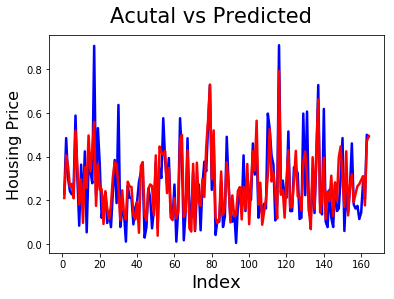

In [226]:
# Plot actual vs predicted
fig = plt.figure()
c = [i for i in range(1, 165, 1)]
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred, color='red', linewidth=2.5, linestyle='-')
fig.suptitle('Acutal vs Predicted', fontsize=21)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Housing Price', fontsize=16)

Text(0, 0.5, 'y_test-y_pred')

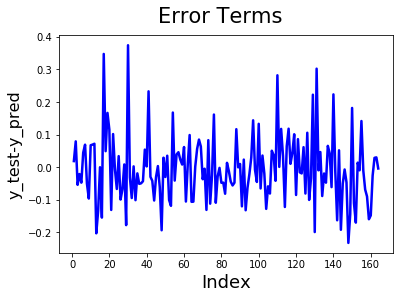

In [229]:
# Error Terms
fig = plt.figure()
plt.plot(c, y_test-y_pred, color='blue', linewidth=2.5, linestyle='-')
fig.suptitle('Error Terms', fontsize=21)
plt.xlabel('Index', fontsize=18)
plt.ylabel('y_test-y_pred', fontsize=16)

Text(0.5, 0, 'y_test-y_pred')

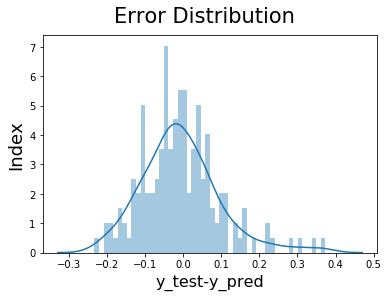

In [234]:
# Error Distribution
fig = plt.figure()
sns.distplot(y_test-y_pred, bins=50)
fig.suptitle('Error Distribution', fontsize=21)
plt.ylabel('Index', fontsize=18)
plt.xlabel('y_test-y_pred', fontsize=16)

Text(0, 0.5, 'y_pred')

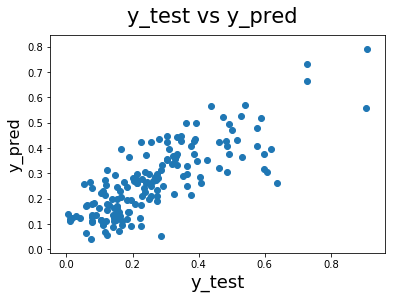

In [236]:
# Error terms in scatter
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=21)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

In [237]:
# RMSE calculation
import numpy as np
from sklearn import metrics
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE:  0.10302458883687156
